In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from sklearn.metrics import mean_squared_error
import json

# Tarea 1
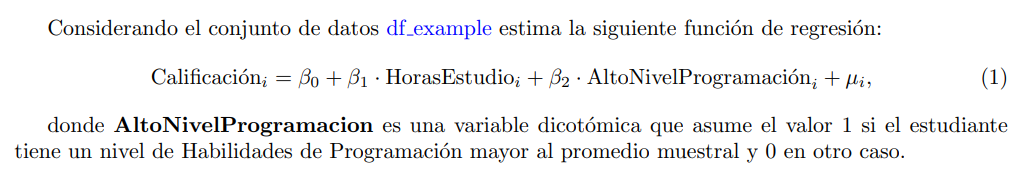

In [ ]:
url = "https://raw.githubusercontent.com/leomanriquezm/introduction-to-econometrics/main/df_example_scores.json"
data = pd.read_json(url) ## cargamos la base de datos

In [ ]:
print(data) ## imprimimos la base de datos

     Horas de Estudio  Habilidades de Programación  Experiencia en Proyectos  \
0            8.211874                           61                         1   
1           13.220641                           75                         1   
2           14.419618                           77                         0   
3           19.972560                           83                         0   
4           16.031263                           57                         1   
..                ...                          ...                       ...   
145         12.600687                           61                         0   
146         14.052802                           71                         1   
147         10.634174                           63                         1   
148          7.639400                           76                         0   
149          8.690788                           73                         0   

     Calificación Promedio  
0         

In [ ]:
promedio = np.mean(data["Habilidades de Programación"]);promedio
## sabemos que el promedio de Habilidades de Programación es de 69.47333

69.47333333333333

In [ ]:
data["Alto nivel de Programación"] = np.where(data["Habilidades de Programación"] > promedio, 1, 0)
print(data)  ## Agregamos otra variable a la base de datos, en la que se incluye
             ## la variable dicotomica Alto nivel de Programación

     Horas de Estudio  Habilidades de Programación  Experiencia en Proyectos  \
0            8.211874                           61                         1   
1           13.220641                           75                         1   
2           14.419618                           77                         0   
3           19.972560                           83                         0   
4           16.031263                           57                         1   
..                ...                          ...                       ...   
145         12.600687                           61                         0   
146         14.052802                           71                         1   
147         10.634174                           63                         1   
148          7.639400                           76                         0   
149          8.690788                           73                         0   

     Calificación Promedio  Alto nivel 

# Creamos un modelo de regresion lineal de la siguiente manera

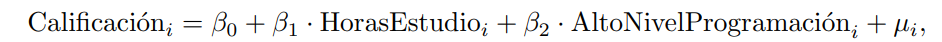

In [ ]:
## Usamos las variables para la regresion como indica el enunciado anterior
X = sm.add_constant(data[["Horas de Estudio", "Alto nivel de Programación"]])
model = sm.OLS(data["Calificación Promedio"],X).fit() ## este es nuestro modelo
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Calificación Promedio   R-squared:                       0.049
Model:                               OLS   Adj. R-squared:                  0.036
Method:                    Least Squares   F-statistic:                     3.760
Date:                   Thu, 07 Sep 2023   Prob (F-statistic):             0.0256
Time:                           23:50:15   Log-Likelihood:                -946.72
No. Observations:                    150   AIC:                             1899.
Df Residuals:                        147   BIC:                             1908.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

#Respondemos la siguiente pregunta
## . ¿Cuál es la diferencia en calificación entre los estudiantes que tienen un alto nivel de programación y los que no, es estadísticamente diferente esa diferencia? *Hint*: el estimador de β2 y su respectivo contraste de hipótesis te serán de ayuda para responder. [ para efectos de t-student de tabla usamos 1,96]

establecemos las pruebas de hipotesis correspondientes a beta2.

###H0 : beta2 = 0

###H1 : beta2 ≠ 0

a traves de tc vs tt, tenemos que tc < tt.
Dado que tc = 0,997 y tt = 1,96


con un nivel de confianza de 95%, no se rechaza H0. Lo que sugiere que el parametro beta2 no es estadisticamente diferente de cero. Por lo que se puede inferir, que un alto nivel de programacion no tiene un efecto significativo en las calificaciones promedio.

a traves del valor-p y intervalo de confianza llegamos a la misma conclusion, dado que valor-p > alpha (0,321 > 0,05). En el IC[-21,587 ; 65,508], por lo que dentro del intervalo incluye el valor cero.

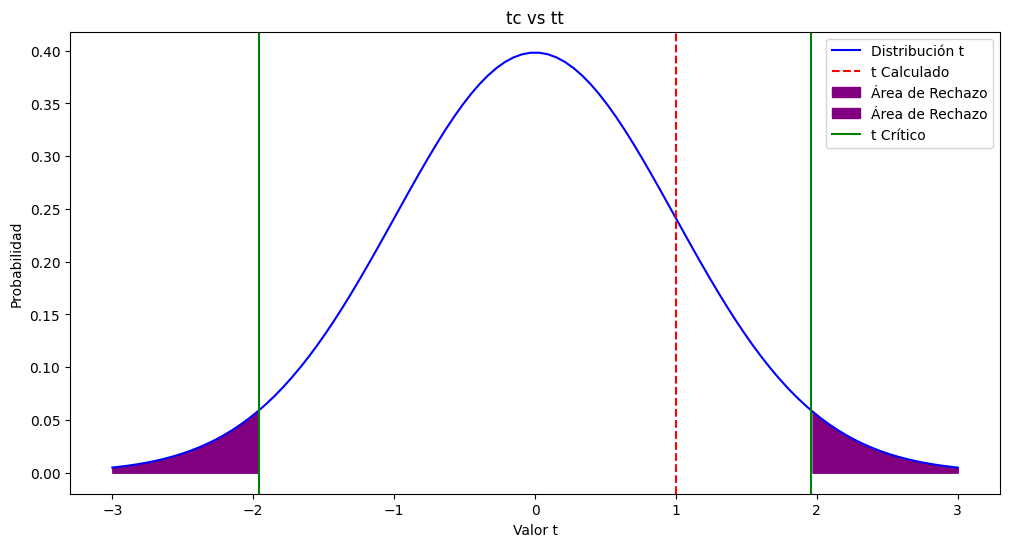

In [ ]:
## representamos graficamente el contra entre el t calculado y el t de tabla

## detallamos los valores correspondientes
t_calculado = 0.997
alpha = 0.05
grados_de_libertad = 150-1
t_critico = (1.96)
t_critico1 = (-1.96)
x = np.linspace(-3, 3, 100) ##rango grafico eje x

plt.figure(figsize=(12, 6)) # dimension grafico
plt.plot(x, stats.t.pdf(x, df=grados_de_libertad), 'b-', label='Distribución t') ##curva distribucion t
plt.axvline(t_calculado, color='red', linestyle='--', label='t Calculado')  ## posicion t calculado
plt.fill_between(x, 0, stats.t.pdf(x, df=grados_de_libertad), where=(x > t_critico), color='purple', alpha=1, label='Área de Rechazo') ##area de rechazo positivo
plt.fill_between(x, 0, stats.t.pdf(x, df=grados_de_libertad), where=(x < t_critico1), color='purple', alpha=1, label='Área de Rechazo') ##area de rechazo negativo
plt.axvline(t_critico, color='green', linestyle='-', label='t Crítico') ## posicion t critico positivo
plt.axvline(t_critico1, color='green', linestyle='-') ## posicion t critico negativo

## titulos
plt.xlabel('Valor t')
plt.ylabel('Probabilidad')
plt.title('tc vs tt')
plt.legend()

plt.show()
